## Loading Datasets

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train = pd.read_csv("train.csv", parse_dates=['date'])
train

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0
1,1,2013-01-01,1,BABY CARE,0.000,0
2,2,2013-01-01,1,BEAUTY,0.000,0
3,3,2013-01-01,1,BEVERAGES,0.000,0
4,4,2013-01-01,1,BOOKS,0.000,0
...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.133,0
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8


In [4]:
test = pd.read_csv("test.csv", parse_dates=['date'])
test

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0
...,...,...,...,...,...
28507,3029395,2017-08-31,9,POULTRY,1
28508,3029396,2017-08-31,9,PREPARED FOODS,0
28509,3029397,2017-08-31,9,PRODUCE,1
28510,3029398,2017-08-31,9,SCHOOL AND OFFICE SUPPLIES,9


In [5]:
stores = pd.read_csv("stores.csv")
print(stores)

    store_nbr           city                           state type  cluster
0           1          Quito                       Pichincha    D       13
1           2          Quito                       Pichincha    D       13
2           3          Quito                       Pichincha    D        8
3           4          Quito                       Pichincha    D        9
4           5  Santo Domingo  Santo Domingo de los Tsachilas    D        4
5           6          Quito                       Pichincha    D       13
6           7          Quito                       Pichincha    D        8
7           8          Quito                       Pichincha    D        8
8           9          Quito                       Pichincha    B        6
9          10          Quito                       Pichincha    C       15
10         11        Cayambe                       Pichincha    B        6
11         12      Latacunga                        Cotopaxi    C       15
12         13      Latacu

In [6]:
oil = pd.read_csv("oil.csv", parse_dates=['date'])
print(oil)

           date  dcoilwtico
0    2013-01-01         NaN
1    2013-01-02       93.14
2    2013-01-03       92.97
3    2013-01-04       93.12
4    2013-01-07       93.20
...         ...         ...
1213 2017-08-25       47.65
1214 2017-08-28       46.40
1215 2017-08-29       46.46
1216 2017-08-30       45.96
1217 2017-08-31       47.26

[1218 rows x 2 columns]


In [7]:
holidays = pd.read_csv("holidays_events.csv", parse_dates=['date'])
print(holidays)

          date        type    locale locale_name  \
0   2012-03-02     Holiday     Local       Manta   
1   2012-04-01     Holiday  Regional    Cotopaxi   
2   2012-04-12     Holiday     Local      Cuenca   
3   2012-04-14     Holiday     Local    Libertad   
4   2012-04-21     Holiday     Local    Riobamba   
..         ...         ...       ...         ...   
345 2017-12-22  Additional  National     Ecuador   
346 2017-12-23  Additional  National     Ecuador   
347 2017-12-24  Additional  National     Ecuador   
348 2017-12-25     Holiday  National     Ecuador   
349 2017-12-26  Additional  National     Ecuador   

                       description  transferred  
0               Fundacion de Manta        False  
1    Provincializacion de Cotopaxi        False  
2              Fundacion de Cuenca        False  
3        Cantonizacion de Libertad        False  
4        Cantonizacion de Riobamba        False  
..                             ...          ...  
345                      

In [8]:
print(train.isnull().sum())

id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64


In [9]:
print(test.isnull().sum())

id             0
date           0
store_nbr      0
family         0
onpromotion    0
dtype: int64


In [10]:
print(stores.isnull().sum())

store_nbr    0
city         0
state        0
type         0
cluster      0
dtype: int64


In [11]:
print(oil.isnull().sum())

date           0
dcoilwtico    43
dtype: int64


In [12]:
oil['dcoilwtico'] = oil['dcoilwtico'].interpolate()

In [13]:
print(oil.isnull().sum())

date          0
dcoilwtico    1
dtype: int64


In [14]:
print(holidays.isnull().sum())

date           0
type           0
locale         0
locale_name    0
description    0
transferred    0
dtype: int64


In [15]:
# Convert 'date' columns in all relevant datasets to datetime format
train['date'] = pd.to_datetime(train['date'], errors='coerce')
oil['date'] = pd.to_datetime(oil['date'], errors='coerce')
holidays['date'] = pd.to_datetime(holidays['date'], errors='coerce')


In [16]:
print("Malformed dates in 'train':", train[train['date'].isna()])
train = train.dropna(subset=['date'])  # Drop rows with missing dates


Malformed dates in 'train': Empty DataFrame
Columns: [id, date, store_nbr, family, sales, onpromotion]
Index: []


In [17]:
train['date'] = train['date'].apply(lambda x: x if pd.notna(x) else '2014-03-01')
train['date'] = pd.to_datetime(train['date'], errors='coerce')


In [18]:
# Convert 'date' columns with error handling and drop/fix malformed dates
for df in [train, oil, holidays]:
    df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Drop rows with NaT in the 'train' dataset
train = train.dropna(subset=['date'])


In [19]:
# Proceed with the merge and time-based feature engineering
train = train.merge(stores, on='store_nbr', how='left')
train = train.merge(oil, on='date', how='left')
train = train.merge(holidays, on='date', how='left')


In [20]:
# Time-based features
train['day'] = train['date'].dt.day
train['month'] = train['date'].dt.month
train['year'] = train['date'].dt.year
train['day_of_week'] = train['date'].dt.dayofweek
train['week_of_year'] = train['date'].dt.isocalendar().week

## Model Building

In [22]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectKBest, f_regression, VarianceThreshold
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [23]:
#Use only numerical columns and drop unnecessary columns
features = ['store_nbr', 'onpromotion', 'day', 'month', 'year', 'day_of_week', 'dcoilwtico']
X = train[features]
y = train['sales'] 


In [24]:
# Train-test split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
# Model Training
model = RandomForestRegressor(n_estimators=50, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=50, random_state=42)

In [26]:
# Model Predictions
predictions = model.predict(X_valid)
print(predictions)

[ 138.093505    228.69863454  422.85244897 ... 2258.22        111.48183071
  317.19246212]


In [35]:
# Evaluate Performance
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_valid, predictions)
r2 = r2_score(y_valid, predictions)
print(f"Mean Squared Error (MSE): {mse}")
print(f"R2 Score: {r2}")


Mean Squared Error (MSE): 616950.4099732111
R2 Score: 0.4842762853999608


# MSE measures the average squared difference between actual and predicted sales.

# R² score shows how well the model explains the variance in the target variable

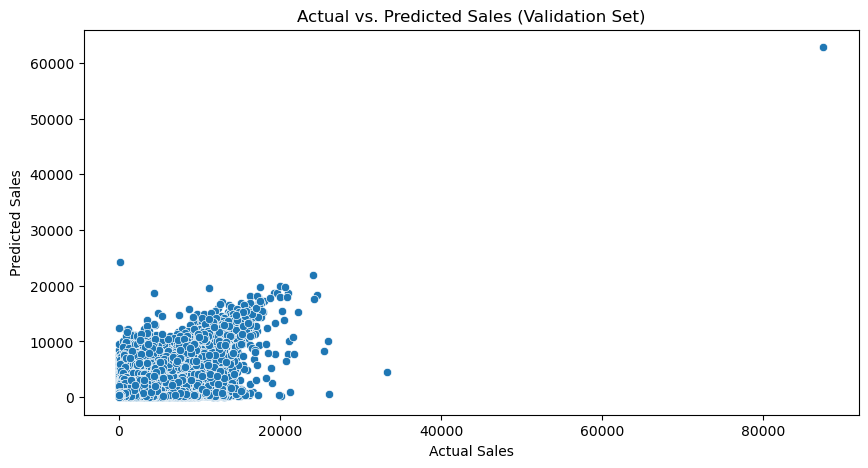

In [37]:
# Visualize Performance
plt.figure(figsize=(10, 5))
sns.scatterplot(x=y_valid, y=predictions)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs. Predicted Sales (Validation Set)")
plt.show()

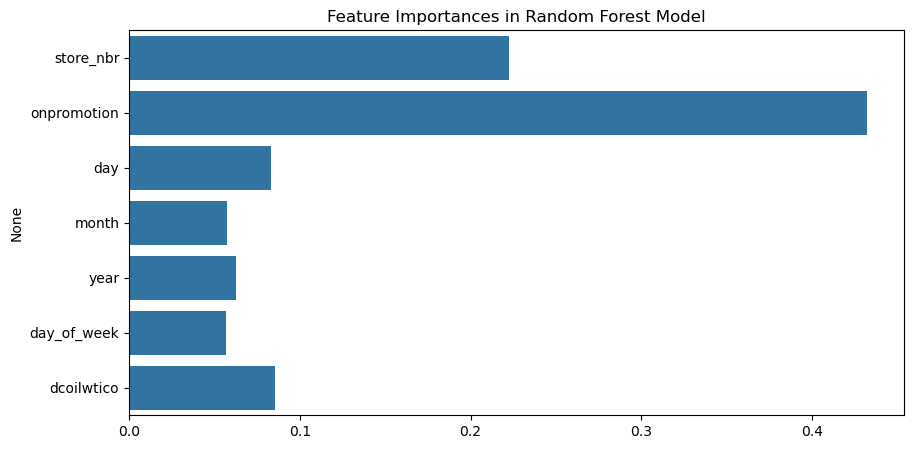

In [39]:
# Plot feature importance
importances = model.feature_importances_
feature_names = X.columns
plt.figure(figsize=(10, 5))
sns.barplot(x=importances, y=feature_names)
plt.title("Feature Importances in Random Forest Model")
plt.show()

In [49]:
from sklearn.metrics import mean_absolute_error

In [51]:
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"\n{model_name} Performance:")
    print(f"Mean Squared Error: {mse:.2f}")
    print(f"Mean Absolute Error: {mae:.2f}")
    print(f"R² Score: {r2:.2f}")

In [53]:
evaluate_model(y_valid, predictions, "Random Forest")


Random Forest Performance:
Mean Squared Error: 616950.41
Mean Absolute Error: 320.85
R² Score: 0.48
